**REF** 

https://towardsdatascience.com/regression-models-with-multiple-target-variables-8baa75aacd

http://cig.fi.upm.es/articles/2015/Borchani-2015-WDMKD.pdf

https://arxiv.org/pdf/cs/0011032.pdf

https://kirank.in/posts-output/2016-07-05-multi-target-regression/

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1678-86212017000300103#f03

Learning Rate and momentum


lr=0.01, momentum=0.9

## Best K Features

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
rfe = RFE(mdl)
rfe.fit(X_train,y_train.iloc[:,1])
rfe.ranking_

array([1, 1, 1, 3, 4, 2, 5])

In [0]:
mdl = LinearRegression()
rfe = RFE(mdl)
rfe.fit(X_train,y_train.iloc[:,0])
rfe.ranking_

array([1, 1, 1, 3, 5, 2, 4])

In [0]:
print(X.columns)

Index(['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
       'Orientation', 'Glazing_Area', 'Glazing_Area_dist'],
      dtype='object')


In [0]:
columns = ['Surface_Area','Wall_Area','Roof_Area','Glazing_Area']
X = df[['Surface_Area','Wall_Area','Roof_Area','Glazing_Area']]
y = df.iloc[:,8:10]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.00,random_state=101)

print('X Train Size is :',X_train.shape)
print('y Train Size is :',y_train.shape)
print('X Test Size is :',X_test.shape)
print('y test Size is :',y_test.shape)


X Train Size is : (768, 4)
y Train Size is : (768, 2)
X Test Size is : (0, 4)
y test Size is : (0, 2)


ZeroDivisionError: ignored

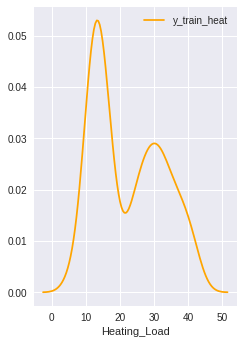

In [0]:
plt.subplot(121)

sns.distplot(y_train['Heating_Load'],kde=True,color='orange',hist=False,label='y_train_heat')
sns.distplot(y_test['Heating_Load'],kde=True,color='green',hist=False,label='y_test_heat')

plt.subplot(122)
sns.distplot(y_train['Cooling_Load'],kde=True,color='orange',hist=False,label='y_train_cool')
sns.distplot(y_test['Cooling_Load'],kde=True,color='green',hist=False,label='y_test_cool')
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler

scale_x = MinMaxScaler()
X_train_scale = scale_x.fit_transform(X_train) 

scale_y = MinMaxScaler()
y_train_scale = scale_y.fit_transform(y_train) 


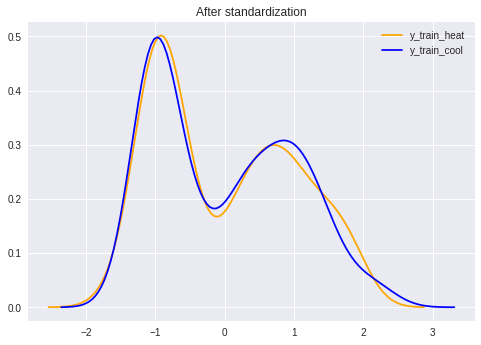

In [0]:
plt.title("After standardization")
sns.distplot(y_train_std[:,0],kde=True,color='orange',hist=False,label='y_train_heat')
sns.distplot(y_train_std[:,1],kde=True,color='blue',hist=False,label='y_train_cool')

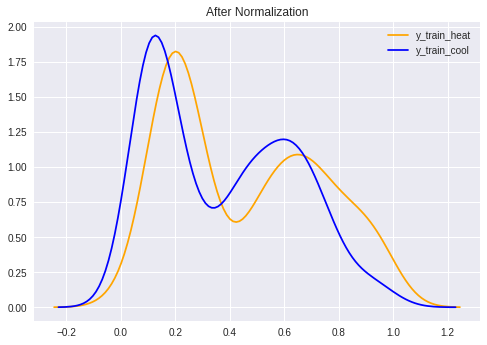

In [0]:
plt.title("After Normalization")
sns.distplot(y_train_scale[:,0],kde=True,color='orange',hist=False,label='y_train_heat')
sns.distplot(y_train_scale[:,1],kde=True,color='blue',hist=False,label='y_train_cool')

In [0]:
from keras import Sequential
from keras import metrics
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout

from keras.callbacks import EarlyStopping

from keras.initializers import he_normal
from keras.initializers import zeros

In [0]:
model1 = Sequential()

model1.add(Dense(64,bias_initializer='zeros',activation='relu',input_dim=X_train_std.shape[1])) #input layer

#hidden Layers
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(rate=0.2))

#model1.add(Dense(32,activation='relu')) 

model1.add(Dense(2)) #Output layer
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 64)                320       
_________________________________________________________________
dense_249 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_250 (Dense)            (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = EarlyStopping(patience=1)
model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model1.fit(X_train_std,y_train_std,batch_size=50,epochs=150,validation_data=(X_test_std,y_test_std))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score_test_std = model1.predict(X_test_std)
score_test = std_y.inverse_transform(score_test_std)
print("Test error",mean_squared_error(y_test,score_test))

score_train_std = model1.predict(X_train_std)
score_train = std_y.inverse_transform(score_train_std)
print("Train Error",mean_squared_error(y_train,score_train))


Train on 576 samples, validate on 192 samples
Epoch 1/150
576/576 [==============================] - 5s 8ms/step - loss: 0.0945 - mean_absolute_error: 0.2375 - val_loss: 0.0590 - val_mean_absolute_error: 0.1708
Epoch 2/150
576/576 [==============================] - 0s 155us/step - loss: 0.0931 - mean_absolute_error: 0.2331 - val_loss: 0.0598 - val_mean_absolute_error: 0.1673
Epoch 3/150
576/576 [==============================] - 0s 168us/step - loss: 0.0909 - mean_absolute_error: 0.2302 - val_loss: 0.0557 - val_mean_absolute_error: 0.1663
Epoch 4/150
576/576 [==============================] - 0s 150us/step - loss: 0.0818 - mean_absolute_error: 0.2183 - val_loss: 0.0527 - val_mean_absolute_error: 0.1585
Epoch 5/150
576/576 [==============================] - 0s 148us/step - loss: 0.0843 - mean_absolute_error: 0.2184 - val_loss: 0.0515 - val_mean_absolute_error: 0.1539
Epoch 6/150
576/576 [==============================] - 0s 142us/step - loss: 0.0783 - mean_absolute_error: 0.2147 - val_l

In [0]:
y1 = np.array(y_test).T[0]
y2 = np.array(y_test).T[1]

predict_y1 = score_test.T[0]
predict_y2 = score_test.T[1]

In [0]:
evaluate_all(y_test,score_test)

In [0]:
from sklearn.metrics import r2_score
print('Heating %.3f'%(r2_score(y1,predict_y1)))
print('Cooling %.3f'%(r2_score(y2,predict_y2)))


In [0]:
from keras import Sequential
from keras import metrics
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout

from keras.callbacks import EarlyStopping

from keras.initializers import he_normal
from keras.initializers import zeros

In [0]:
model1 = Sequential()

model1.add(Dense(64,bias_initializer='zeros',activation='relu',input_dim=X_train_std.shape[1])) #input layer

#hidden Layers
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(rate=0.2))

#model1.add(Dense(32,activation='relu')) 

model1.add(Dense(2)) #Output layer
model1.summary()

In [0]:
early_stop = EarlyStopping(patience=1)
model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model1.fit(X_train_std,y_train_std,batch_size=50,epochs=150,validation_data=(X_test_std,y_test_std))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score_test_std = model1.predict(X_test_std)
score_test = std_y.inverse_transform(score_test_std)
print("Test error",mean_squared_error(y_test,score_test))

score_train_std = model1.predict(X_train_std)
score_train = std_y.inverse_transform(score_train_std)
print("Train Error",mean_squared_error(y_train,score_train))


In [0]:
y1 = np.array(y_test).T[0]
y2 = np.array(y_test).T[1]

predict_y1 = score_test.T[0]
predict_y2 = score_test.T[1]

In [0]:
evaluate_all(y_test,score_test)

In [0]:
from sklearn.metrics import r2_score
print('Heating %.3f'%(r2_score(y1,predict_y1)))
print('Cooling %.3f'%(r2_score(y2,predict_y2)))


## Start

In [0]:
#import/install required libraries for importing file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1gw940ZtB0HJtSiF174GGNyvolcFmPY_s'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ENB2012_data.csv')  

downloaded = drive.CreateFile({'id':'12c4KYEpWSoocdP8jL9VJpBb6gdMjaA50'}) # replace the id with id of file you want to access
downloaded.GetContentFile('results.xlsx')  


In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


import keras


Using TensorFlow backend.


In [0]:
from keras import Sequential
from keras import metrics
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout

from keras.callbacks import EarlyStopping

from keras.layers import LeakyReLU
from keras.initializers import he_normal
from keras.initializers import zeros

In [0]:
EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]


def _relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) /\
               (_error(actual[seasonality:], _naive_forecasting(actual, seasonality)) + EPSILON)

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Bounded Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(_error(actual[seasonality:], _naive_forecasting(actual, seasonality)))
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """ Geometric mean """
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Error """
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """ Geometric Mean Absolute Error """
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """ Median Absolute Error """
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Percentage Error """
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Error """
    __mae = mae(actual, predicted)
    return np.sqrt(np.sum(np.square(_error(actual, predicted) - __mae))/(len(actual) - 1))


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Percentage Error """
    __mape = mape(actual, predicted)
    return np.sqrt(np.sum(np.square(_percentage_error(actual, predicted) - __mape))/(len(actual) - 1))


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """ Root Mean Squared Scaled Error """
    q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """ Integral Normalized Root Squared Error """
    return np.sqrt(np.sum(np.square(_error(actual, predicted))) / np.sum(np.square(actual - np.mean(actual))))


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Error """
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Absolute Error """
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Median Relative Absolute Error """
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Geometric Mean Relative Absolute Error """
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Bounded Relative Absolute Error """
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Unscaled Mean Bounded Relative Absolute Error """
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def r2(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    return r2_score(actual,predicted)

METRICS = {
    'mse': mse,
    'rmse': rmse,
    'nrmse': nrmse,
    #'me': me,
    #'mae': mae,
    'mad': mad,
    #'gmae': gmae,
    #'mdae': mdae,
    #'mpe': mpe,
    'mape': mape,
    #'mdape': mdape,
    'smape': smape,
    'r2' : r2
    #'smdape': smdape,
    #'maape': maape,
    #'mase': mase,
    #'std_ae': std_ae,
    #'std_ape': std_ape,
    #'rmspe': rmspe,
    #'rmdspe': rmdspe,
    #'rmsse': rmsse,
    #'inrse': inrse,
    #'rrse': rrse,
    #'mre': mre,
    #'rae': rae,
    #'mrae': mrae,
    #'mdrae': mdrae,
    #'gmrae': gmrae,
    #'mbrae': mbrae,
    #'umbrae': umbrae,
}


def evaluate(actual: np.ndarray, predicted: np.ndarray, metrics=('mse','rmse','nrmse', 'mad','mape', 'smape',"r2")):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print('Unable to compute metric {0}: {1}'.format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

## EDA

In [0]:
df = pd.read_csv('ENB2012_data.csv',names=['Refactive_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_dist','Heating_Load','Cooling_Load'],skiprows=[0])
#ORIEN = East, west, north, south
#

In [0]:
!cat /proc/diskstats

   7       0 loop0 22675 0 1263706 22880 3268 0 97408 3642 0 1868 12693
   7       1 loop1 0 0 0 0 0 0 0 0 0 0 0
   7       2 loop2 0 0 0 0 0 0 0 0 0 0 0
   7       3 loop3 0 0 0 0 0 0 0 0 0 0 0
   7       4 loop4 0 0 0 0 0 0 0 0 0 0 0
   7       5 loop5 0 0 0 0 0 0 0 0 0 0 0
   7       6 loop6 0 0 0 0 0 0 0 0 0 0 0
   7       7 loop7 0 0 0 0 0 0 0 0 0 0 0
   8       0 sda 27747 1035 2188716 21069 4329 1842 158985 30360 0 6454 36179
   8       1 sda1 23812 164 1921046 18204 4215 1842 158985 30357 0 5838 35228
   8       2 sda2 96 0 3408 42 0 0 0 0 0 3 5
   8       3 sda3 3400 839 243132 2573 0 0 0 0 0 537 730
   8       4 sda4 96 0 3408 45 0 0 0 0 0 4 10
   8       5 sda5 120 0 12384 77 0 0 0 0 0 11 24
   8       6 sda6 0 0 0 0 0 0 0 0 0 0 0
   8       7 sda7 0 0 0 0 0 0 0 0 0 0 0
   8       8 sda8 35 32 1162 16 0 0 0 0 0 1 1
   8       9 sda9 0 0 0 0 0 0 0 0 0 0 0
   8      10 sda10 0 0 0 0 0 0 0 0 0 0 0
   8      11 sda11 102 0 1744 51 0 0 0 0 0 1 1
   8      12 sda12 68 0 2272 36 0 

In [0]:
df.head()

,Refactive_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_dist,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [0]:
df.shape

(768, 10)

<b>Observation : </b>
1. The data set contain 768 points.
2. This is a 10 Dimensional data.
3. With 8 - Independent variables and 2 dependent variables(Heating Load and Cooling Load).
4. This is a MIMO(Multiple Input and Multiple Output) task.

In [0]:
df.describe()

,Refactive_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_dist,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


ref: file:///home/vishnu/Downloads/GeletkaV_ShapeBuildings%20(2).pdf  <br>

ref: file:///home/vishnu/Downloads/ENB2012paper.pdf(DATA SET)

In [0]:
df.nunique()

Refactive_Compactness     12
Surface_Area              12
Wall_Area                  7
Roof_Area                  4
Overall_Height             2
Orientation                4
Glazing_Area               4
Glazing_Area_dist          6
Heating_Load             586
Cooling_Load             636
dtype: int64

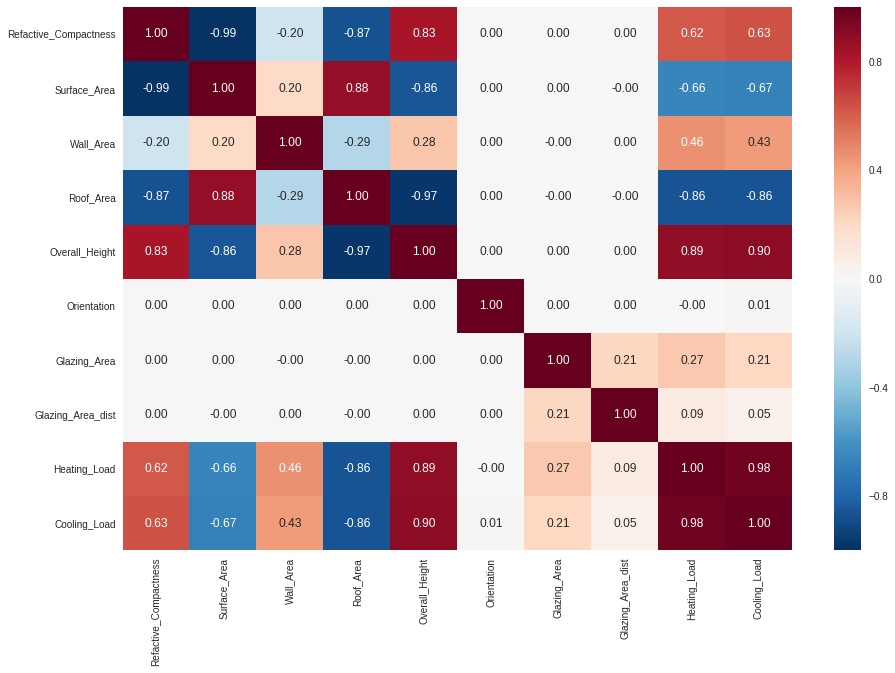

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',)

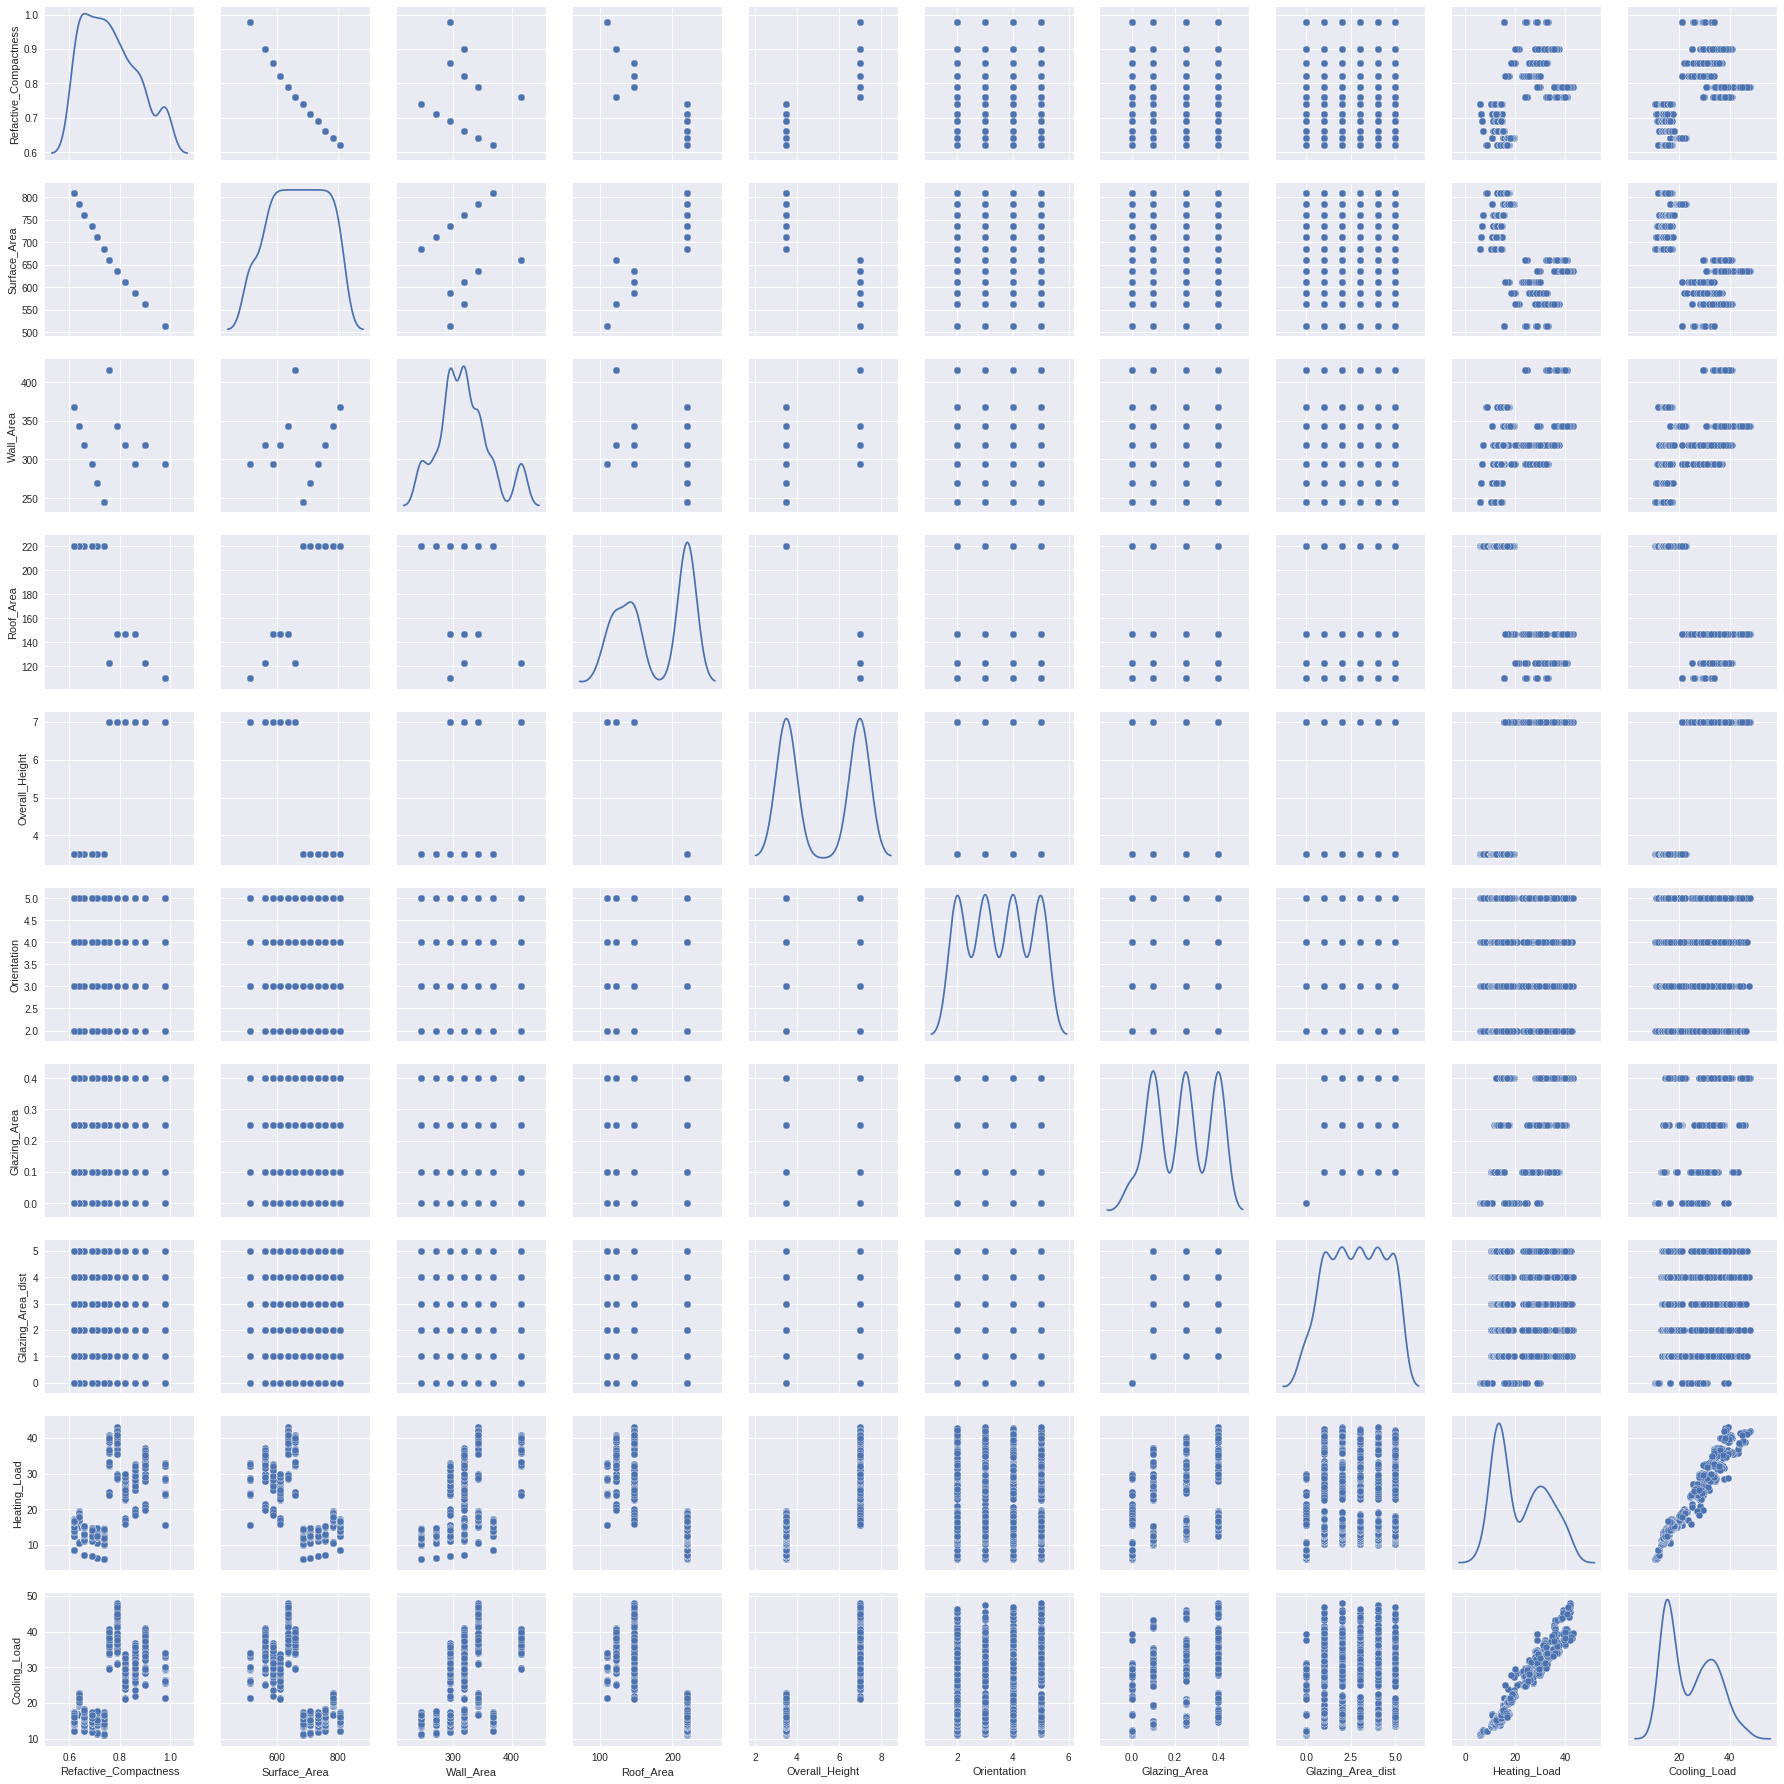

In [0]:
sns.pairplot(df,vars=['Refactive_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_dist','Heating_Load','Cooling_Load'],diag_kind='kde')

<b> Observations:</b>
1. We can clearly see that Refractive_compactness and surface_area are highly corelated.
2. Distributions of Heating_Load and Cooling_load are very simillar.

Lets, closely look at distributions of heating load and cooling load.

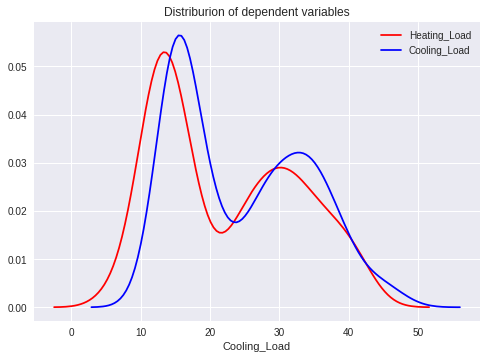

In [0]:
sns.distplot(df['Heating_Load'],kde=True,hist=False,color='red',label='Heating_Load')
sns.distplot(df['Cooling_Load'],kde=True,hist=False,color='blue',label='Cooling_Load')
plt.legend()
plt.title("Distriburion of dependent variables");

Do KS test

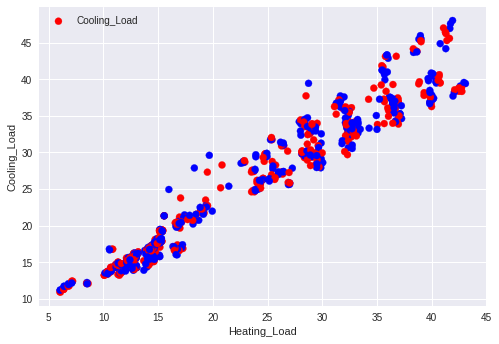

In [0]:
ax = plt.scatter(df['Heating_Load'],df['Cooling_Load'],c=['red','blue'])
plt.xlabel('Heating_Load')
plt.ylabel('Cooling_Load')
plt.legend();


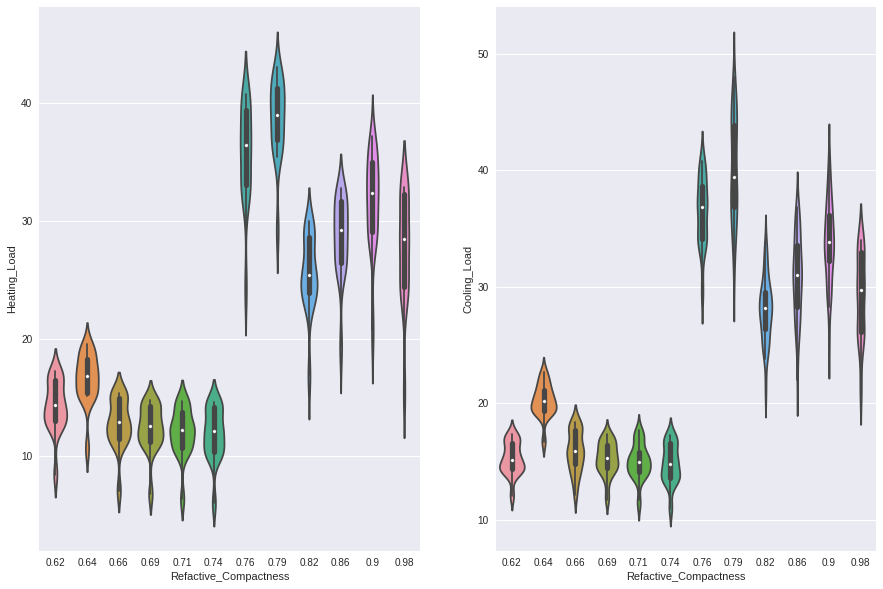

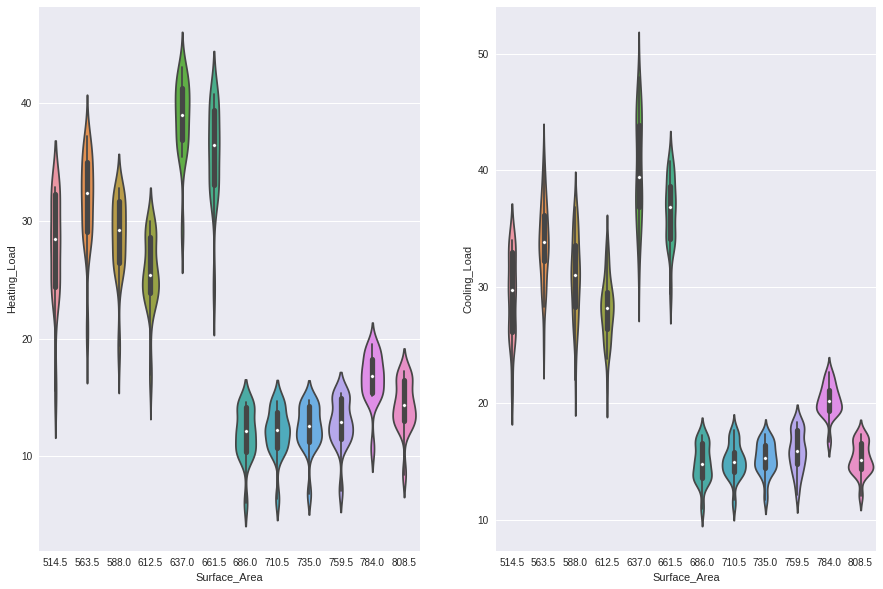

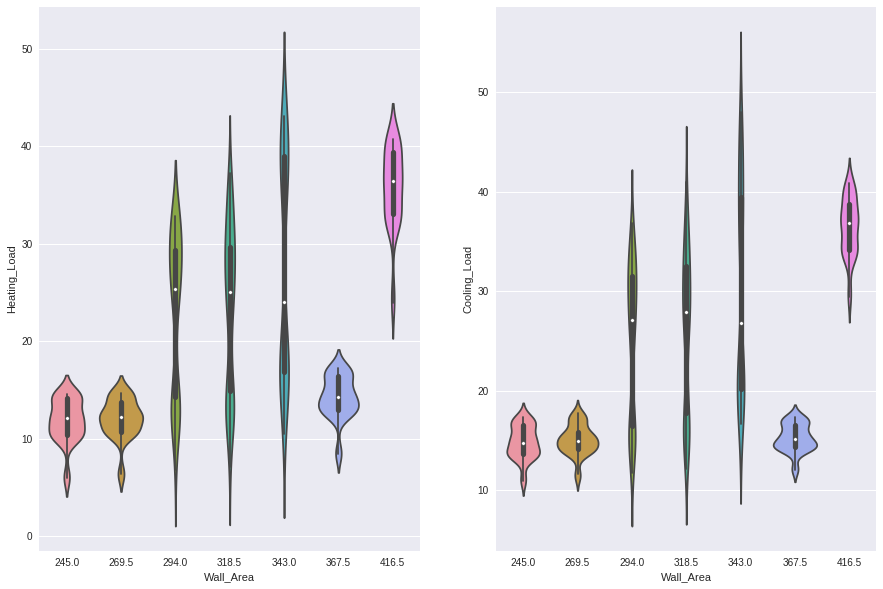

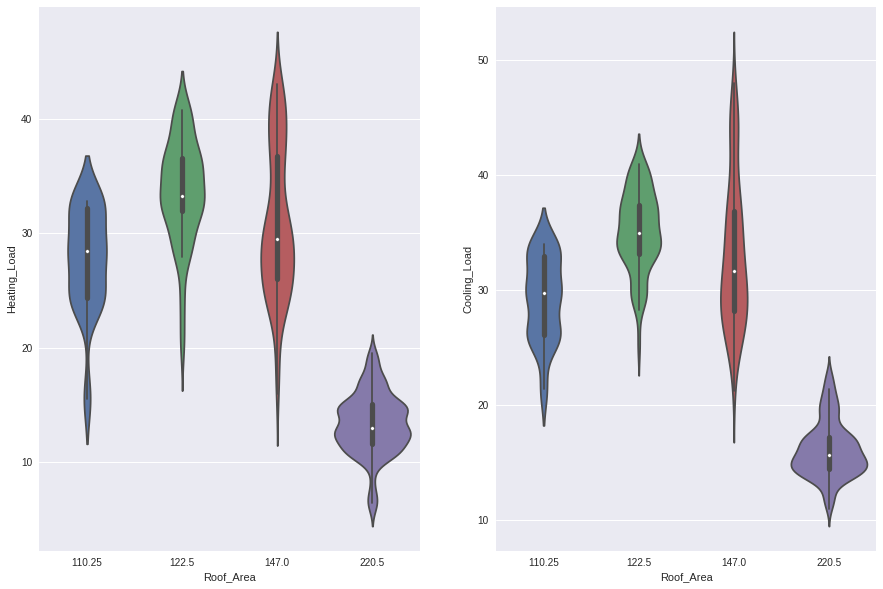

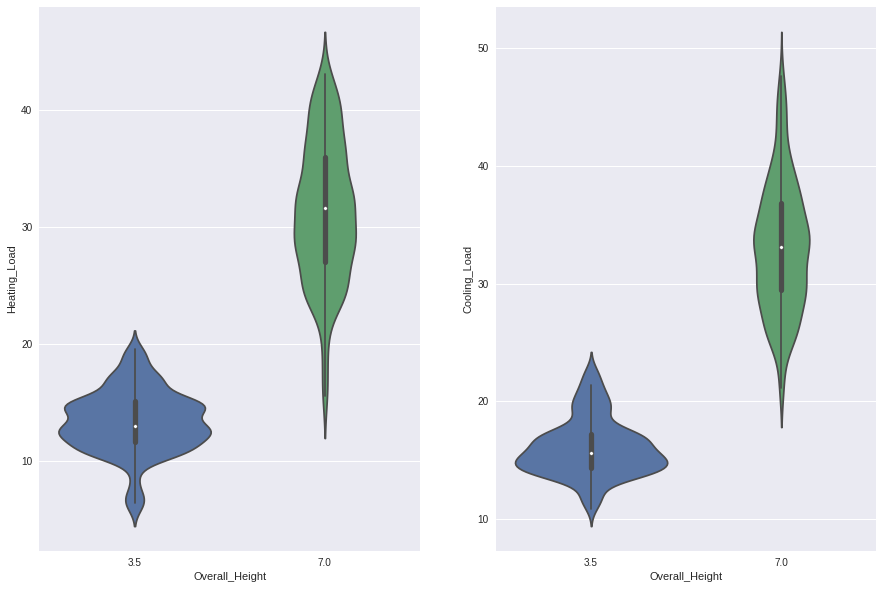

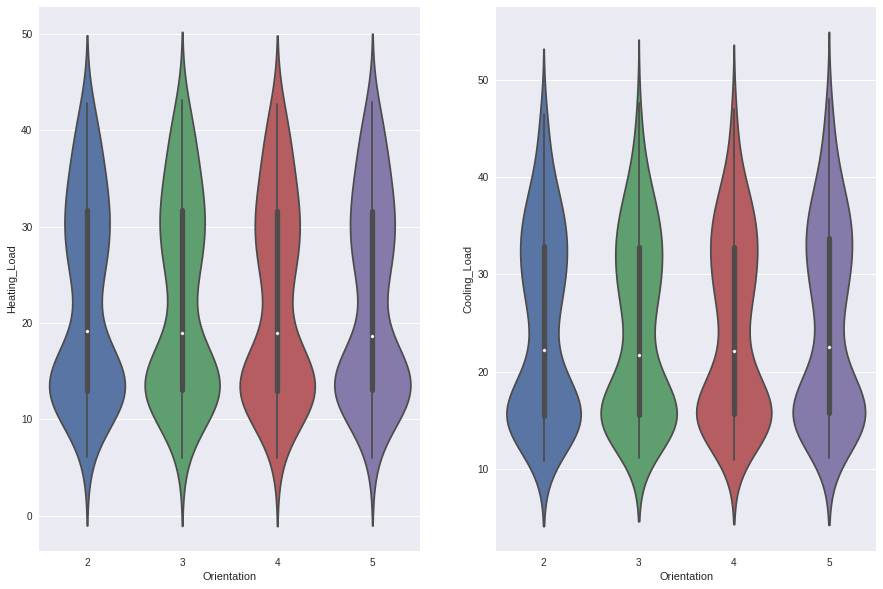

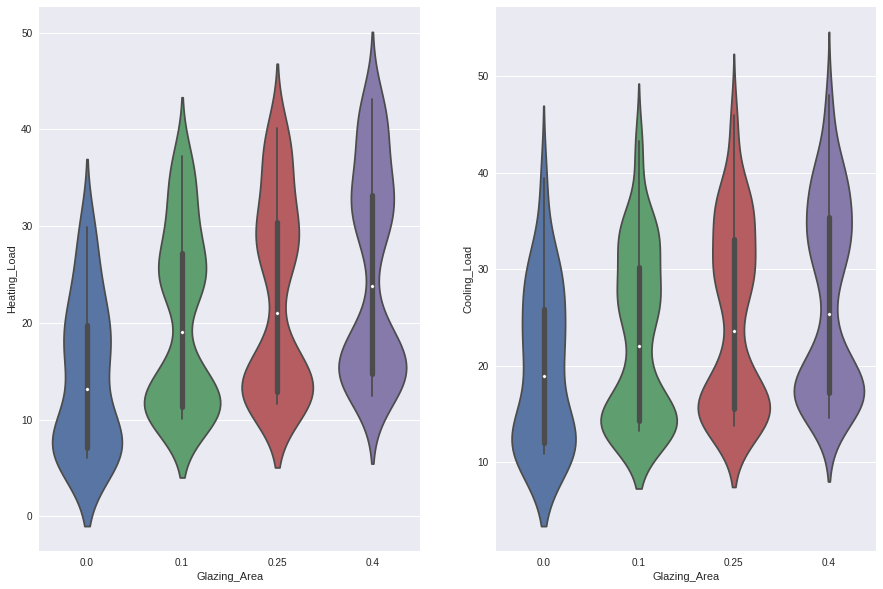

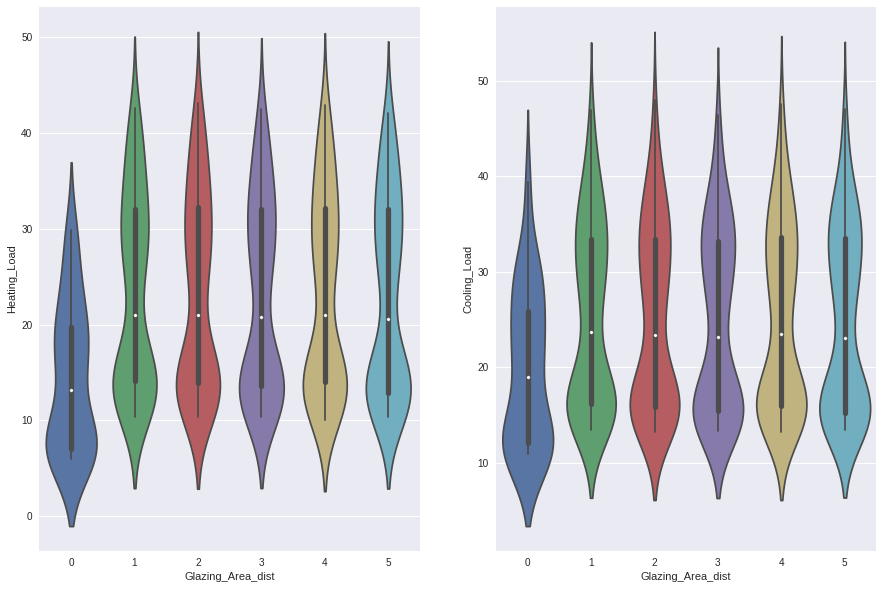

In [0]:
def voilinplots(x):
    plt.figure(figsize=(15,10))    
    plt.subplot(1,2,1)
    sns.violinplot(x=df[x],y=df['Heating_Load'])
    plt.subplot(1,2,2)
    sns.violinplot(x=df[x],y=df['Cooling_Load'])
    plt.show();
for i in df.columns:
    if(not i in ['Heating_Load','Cooling_Load']):
        voilinplots(i)

# Data Preparation

In [0]:
df.head()

,Refactive_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_dist,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## MIMO(2) (remove refractive index)

In [0]:

X = df.iloc[:,1:8]
y = df.iloc[:,8:10]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0,random_state=101)

print('X Train Size is :',X_train.shape)
print('y Train Size is :',y_train.shape)
print('X Test Size is :',X_test.shape)
print('y test Size is :',y_test.shape)


X Train Size is : (768, 7)
y Train Size is : (768, 2)
X Test Size is : (0, 7)
y test Size is : (0, 2)


In [0]:
from sklearn.preprocessing import MinMaxScaler

scale_x = MinMaxScaler()
X_train_scale = scale_x.fit_transform(X_train) 

scale_y = MinMaxScaler()
y_train_scale = scale_y.fit_transform(y_train) 

x = pd.DataFrame(X_train_scale)
y = pd.DataFrame(y_train_scale)

In [0]:
print('X Train Size is :',X_train.shape)
print('y Train Size is :',y_train.shape)
print('X Test Size is :',X_test.shape)
print('y test Size is :',y_test.shape)


X Train Size is : (768, 4)
y Train Size is : (768, 2)
X Test Size is : (0, 4)
y test Size is : (0, 2)


## Build Models

In [0]:

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Default 0.01
 
RMSprop = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0) #Default 0.001
 
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #Default 0.001


In [0]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5)

In [0]:
def compute(orig,pred):
    
    pred = scale_y.inverse_transform(pred)
    orig = scale_y.inverse_transform(orig)
    
    score =  evaluate_all(pred,orig)
    return score


## Layer 1

### Adam

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #Default 0.001

activations = ['relu']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(4,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(4,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=50,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        print(score[i])

        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
    print('-'*100)
    print(result_df)    


{'r2': 0.8332833531255803, 'mse': 13.242151384261096, 'nrmse': 0.11426956259779238, 'mad': 2.6724699577727873, 'smape': 0.12165670799044849, 'mape': 0.11808755083216879, 'rmse': 3.6389766946575923}
{'r2': 0.8851584418516883, 'mse': 9.79691349711975, 'nrmse': 0.10710175861223475, 'mad': 2.3200485776926016, 'smape': 0.10991837403624857, 'mape': 0.10765543105451644, 'rmse': 3.130002156088674}
{'r2': 0.8710148206451769, 'mse': 10.534185539539102, 'nrmse': 0.11636107510511493, 'mad': 2.395249200053029, 'smape': 0.1076993159244809, 'mape': 0.10820256349603749, 'rmse': 3.2456410059553877}
{'r2': 0.9074013603786292, 'mse': 8.333368451752335, 'nrmse': 0.1008256539838916, 'mad': 2.082355148465026, 'smape': 0.09626320150894857, 'mape': 0.0943190589067134, 'rmse': 2.8867574286303195}
{'r2': 0.9067945574998602, 'mse': 8.442404901051427, 'nrmse': 0.10040362880640726, 'mad': 2.1436990103378792, 'smape': 0.09944274340836153, 'mape': 0.09772108009992664, 'rmse': 2.9055816803269234}
--------------------

In [0]:
result_adam = pd.DataFrame(final_result).T
result_adam

,mad,mape,mse,nrmse,r2,rmse,smape
relu,328.141748,0.380338,135409.606078,0.960112,-37.695584,367.715965,0.385224


### RMS Prop

In [0]:
RMSprop = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0) #Default 0.001

activations = ['leaky_relu']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(4,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(4,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=200,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
    result_df
    

,1,2,3,4,5,avg
mad,302.763361,315.703420,337.225884,342.902725,341.213675,327.961813
mape,0.343828,0.358479,0.388299,0.396671,0.402714,0.377998
mse,120925.555252,123558.238338,135488.469258,145171.114895,149576.136157,134943.902780
nrmse,1.019295,1.132396,1.113404,1.280003,1.219087,1.152837
r2,-37.299929,-44.390402,-44.756567,-57.935935,-63.673320,-49.611231
rmse,347.743519,351.508518,368.087584,381.013274,386.750742,367.020727
smape,0.405267,0.387970,0.389448,0.379261,0.363644,0.385118


In [0]:
result_rms = pd.DataFrame(final_result).T
result_rms

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,1.522299,0.072048,4.375106,0.062301,0.949635,2.085125,0.071497
relu,1.938631,0.086598,7.219492,0.082788,0.915792,2.680675,0.087222
sigmoid,2.283305,0.098350,11.420799,0.105070,0.861800,3.343290,0.096863
tanh,1.969106,0.083968,8.193756,0.089990,0.901354,2.850456,0.084385


### SGD

In [0]:
activations = ['relu','leaky_relu','tanh','sigmoid']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(4,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(4,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='sgd',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=200,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
    

In [0]:
result_sgd = pd.DataFrame(final_result).T
result_sgd

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,2.702891,0.113413,15.488524,0.123892,0.801278,3.918574,0.112519
relu,2.120828,0.088330,9.307168,0.091335,0.889266,3.043850,0.087962
sigmoid,2.676029,0.114071,14.891771,0.115089,0.810994,3.844644,0.113087
tanh,2.248272,0.095228,10.202141,0.097632,0.877149,3.184016,0.094850


#### Summary Layer 1


In [0]:
result_layer1 = pd.concat([result_adam,result_rms,result_sgd])

result_layer1 = result_layer1.round(3)
result_layer1


,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,2.100,0.089,8.474,0.083,0.900,2.901,0.089
relu,2.716,0.114,15.456,0.125,0.801,3.915,0.113
sigmoid,2.623,0.112,14.358,0.114,0.819,3.759,0.110
tanh,2.053,0.087,8.580,0.088,0.899,2.921,0.087
leaky_relu,1.522,0.072,4.375,0.062,0.950,2.085,0.071
relu,1.939,0.087,7.219,0.083,0.916,2.681,0.087
sigmoid,2.283,0.098,11.421,0.105,0.862,3.343,0.097
tanh,1.969,0.084,8.194,0.090,0.901,2.850,0.084
leaky_relu,2.703,0.113,15.489,0.124,0.801,3.919,0.113
relu,2.121,0.088,9.307,0.091,0.889,3.044,0.088


In [0]:
from google.colab import files
result_layer1.to_csv('result_layer1.csv')
files.download("result_layer1.csv")#file name


## Layer 2

### Adam

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #Default 0.001

activations = ['relu']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(8,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
        model1.add(Dense(4))
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(8,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        model1.add(Dense(4,activation='relu'))
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=50,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
  
    result_df

In [0]:
result_adam = pd.DataFrame(final_result).T
result_adam

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,1.929155,0.084654,7.611354,0.086519,0.909630,2.753154,0.085117
relu,1.513890,0.068879,4.408137,0.066870,0.950141,2.080622,0.068883
sigmoid,2.260869,0.095823,10.551017,0.103919,0.871478,3.227491,0.096346
tanh,1.888514,0.085457,7.124498,0.084941,0.917959,2.662018,0.084874


### RMS prop

In [0]:
activations = ['relu','leaky_relu','tanh','sigmoid']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(8,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
        model1.add(Dense(4))
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(8,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        model1.add(Dense(4,activation='relu'))
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=50,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
    

In [0]:
result_rms = pd.DataFrame(final_result).T
result_rms

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,2.024086,0.094839,7.610181,0.085908,0.916223,2.755165,0.092338
relu,2.005853,0.092663,8.034371,0.095967,0.906210,2.825180,0.093319
sigmoid,2.178744,0.092473,9.712879,0.094938,0.886405,3.112913,0.091931
tanh,1.717350,0.071882,6.069092,0.077010,0.929460,2.459082,0.073525


### SGD

In [0]:
activations = ['relu','leaky_relu','tanh','sigmoid']

final_result = {}

for active in activations:
    model1 = Sequential()

    
    if active is 'leaky_relu':
        model1.add(Dense(8,bias_initializer='zeros',input_dim=X_train_scale.shape[1])) #input layer
        model1.add(LeakyReLU(0.2))
        model1.add(Dense(4))
        model1.add(LeakyReLU(0.2))
    else:
        model1.add(Dense(8,bias_initializer='zeros',activation=active,input_dim=X_train_scale.shape[1])) #input layer
        model1.add(Dense(4,activation='relu'))
        
    model1.add(Dense(2)) #Output layer

    model1.compile(optimizer='sgd',loss='mse',metrics=['mae'])
    score = {}

    i = 1
    for train,test in cv.split(x,y):
        orig = y.iloc[test]
        #print(orig.shape)
        model1.fit(x.iloc[train],y.iloc[train],batch_size=10,epochs=50,verbose = 0)

        pred = model1.predict(x.iloc[test])

        score[i] = compute(orig,pred)
        i = i + 1
    result_df = pd.DataFrame(score)
    result_df['avg'] = result_df.mean(numeric_only=True,axis=1)
    
    final_result[active] = result_df['avg']
    

In [0]:
result_sgd = pd.DataFrame(final_result).T
result_sgd

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,2.898149,0.122555,16.403296,0.128487,7.922432e-01,4.037784,0.121310
relu,2.465910,0.099107,12.488655,0.129533,8.442172e-01,3.510278,0.099189
sigmoid,8.888982,0.381075,96.670631,4.283654,-3.335044e+10,9.829386,0.391487
tanh,2.304828,0.098105,10.856555,0.105744,8.684481e-01,3.283002,0.098699


#### Summary Layer 2

In [0]:
result_layer2 = pd.concat([result_adam,result_rms,result_sgd])
result_layer2 = result_layer2.round(3)
pd.options.display.float_format = '{:.2f}'.format

result_layer2

,mad,mape,mse,nrmse,r2,rmse,smape
leaky_relu,1.93,0.09,7.61,0.09,0.91,2.75,0.09
relu,1.51,0.07,4.41,0.07,0.95,2.08,0.07
sigmoid,2.26,0.10,10.55,0.10,0.87,3.23,0.10
tanh,1.89,0.09,7.12,0.09,0.92,2.66,0.09
leaky_relu,2.02,0.10,7.61,0.09,0.92,2.75,0.09
relu,2.01,0.09,8.03,0.10,0.91,2.83,0.09
sigmoid,2.18,0.09,9.71,0.10,0.89,3.11,0.09
tanh,1.72,0.07,6.07,0.08,0.93,2.46,0.07
leaky_relu,2.90,0.12,16.40,0.13,0.79,4.04,0.12
relu,2.47,0.10,12.49,0.13,0.84,3.51,0.10


In [0]:
from google.colab import files
result_layer2.to_csv('result_layer2.csv')
files.download("result_layer2.csv")#file name
